Question 1: What is Simple Linear Regression? 1Simple Linear Regression is a statistical method used to model the relationship between a single independent variable ($X$) and a single dependent variable ($Y$). The goal is to find a linear equation (a straight line) that best predicts the value of the dependent variable based on the independent variable.The mathematical formula is represented as:$$Y = \beta_0 + \beta_1 X + \epsilon$$$Y$: Dependent variable (target).$X$: Independent variable (predictor).$\beta_0$: The Y-intercept.$\beta_1$: The slope of the line.$\epsilon$: The error term (residuals).

Question 2: What are the key assumptions of Simple Linear Regression?

To ensure the model's predictions are reliable and statistically valid, four primary assumptions must be met:

Linearity: The relationship between the independent and dependent variables must be linear.

Independence: The observations in the dataset must be independent of each other.

Homoscedasticity: The variance of the error terms (residuals) should be constant across all levels of the independent variable.

Normality: The residuals (errors) of the model should follow a normal distribution.

Question 3: What is heteroscedasticity, and why is it important to address in regression models?

Heteroscedasticity occurs when the variance of the residuals is not constant; instead, the "spread" of the errors changes as the value of the independent variable changes (often forming a cone or fan shape in a residual plot).

Why it is important to address:

Invalidates Significance Tests: It leads to biased standard errors, which makes p-values ​​and confidence intervals unreliable.

Inefficiency: While the model coefficients may still be unbiased, they are no longer the "best" (minimum variance) estimates, leading to a less precise model.

Question 4: What is Multiple Linear Regression? 4Multiple Linear Regression (MLR) is an extension of simple linear regression used to predict the outcome of a dependent variable based on two or more independent variables.The formula is expressed as:$$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_n X_n + \epsilon$$This allows data scientists to account for multiple factors simultaneously (eg, predicting house prices using area, age, and location).

Question 5: What is polynomial regression, and how does it differ from linear regression? 6Polynomial regression is a form of regression where the relationship between the independent variable$X$and the dependent variable$Y$is modeled as an$n^{th}$degree polynomial.Key Differences:Shape: Linear regression models a straight line, whereas polynomial regression can model curved relationships (eg, parabolas or S-curves).Complexity: Linear regression is simpler ($Y = \beta_0 + \beta_1 X$), while polynomial regression includes higher-order terms like$X^2$or$X^3$($Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \dots$).Flexibility: Polynomial regression can fit non-linear data but is more prone to "overfitting" if the degree is too high.

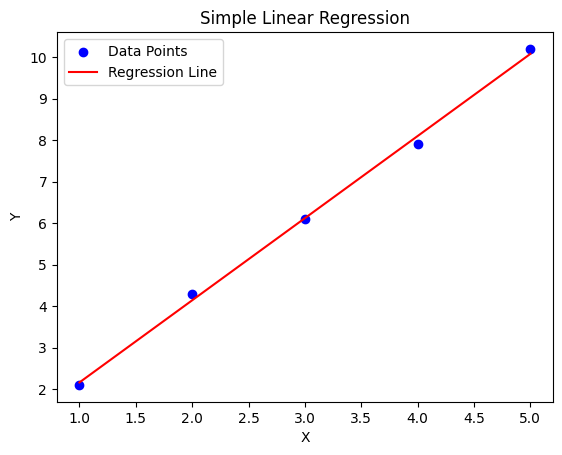

In [3]:
# Question 6: Python Implementation - Simple Linear Regression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample Data [cite: 26, 27]
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

# Fit Model
model = LinearRegression()
model.fit(X, Y)
Y_pred = model.predict(X)

# Plotting [cite: 28]
plt.scatter(X, Y, color='blue', label='Data Points')
plt.plot(X, Y_pred, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

In [4]:
# Question 7: Multiple Linear Regression & VIF

import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Data [cite: 33, 34, 35]
data = {
    'Area': [1200, 1500, 1800, 2000],
    'Rooms': [2, 3, 3, 4],
    'Price': [250000, 300000, 320000, 370000]
}
df = pd.DataFrame(data)

# Multiple Regression
X = df[['Area', 'Rooms']]
X = sm.add_constant(X) # Adding intercept
y = df['Price']
model = sm.OLS(y, X).fit()

# Check Multicollinearity using VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(model.summary())
print("\nVIF Results:\n", vif_data)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     351.0
Date:                Thu, 18 Dec 2025   Prob (F-statistic):             0.0377
Time:                        17:06:14   Log-Likelihood:                -35.242
No. Observations:                   4   AIC:                             76.48
Df Residuals:                       1   BIC:                             74.64
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.032e+05   9488.293     10.872      0.0

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


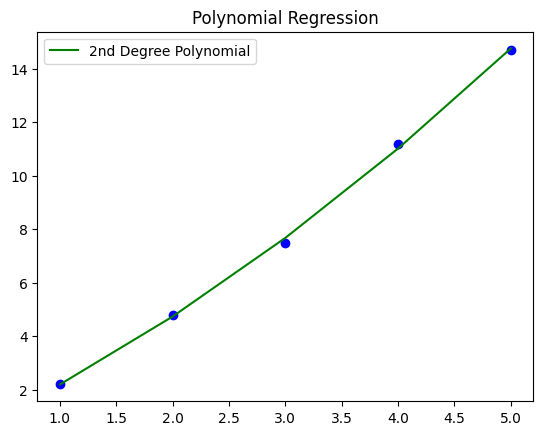

In [5]:
# Question 8: Polynomial Regression (2nd Degree)
from sklearn.preprocessing import PolynomialFeatures

# Data [cite: 38, 42]
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

# Transform to 2nd degree polynomial [cite: 42]
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit and Predict
poly_model = LinearRegression()
poly_model.fit(X_poly, Y)
Y_poly_pred = poly_model.predict(X_poly)

# Plotting [cite: 42]
plt.scatter(X, Y, color='blue')
plt.plot(X, Y_poly_pred, color='green', label='2nd Degree Polynomial')
plt.title('Polynomial Regression')
plt.legend()
plt.show()

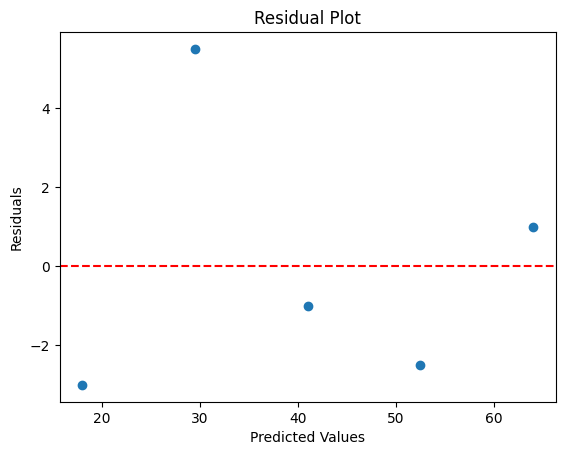

In [6]:
# Question 9: Residuals Plot & Heteroscedasticity Assessment
# Data [cite: 45, 46]
X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

# Train Model
model = LinearRegression().fit(X, Y)
predictions = model.predict(X)
residuals = Y - predictions

# Plot Residuals [cite: 45]
plt.scatter(predictions, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Assessment[cite: 47]:
# If the points are randomly scattered, homoscedasticity holds.
# If they form a pattern (like a cone), heteroscedasticity is present.

Question 10: Imagine you are a data scientist working for a real estate company. You need to predict house prices using features like area, number of rooms, and location. However, you detect heteroscedasticity and multicollinearity in your regression model. Explain the steps you would take to address these issues and ensure a robust model.

As a data scientist dealing with house price predictions, here is how I would address the issues detected:

1.To Address Multicollinearity:


Remove Highly Correlated Features: If 'Area' and 'Rooms' are too highly correlated (high VIF), I might drop one or combine them into a single "size" index.

Principal Component Analysis (PCA): Transform the correlated features into a set of linearly uncorrelated components.

Regularization: Use Ridge or Lasso regression, which penalizes large coefficients and helps manage multicollinearity.

2.To Address Heteroscedasticity:

Log Transformation: Apply a log transformation to the dependent variable (Price) to stabilize the variance.

Weighted Least Squares (WLS): Give less weight to observations with higher variance.


Robust Standard Errors: Use "sandwich" estimators to calculate standard errors that are robust to heteroscedasticity, ensuring the p-values ​​are reliable.